# check whether all the packages are installed

In [156]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

# the packages you need for this task
packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa', 'Hmisc', 'tseries','aTSA','FitAR')

ipak(packages)

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa     Hmisc 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
  tseries      aTSA     FitAR 
     TRUE      TRUE      TRUE

# load all packages into R

In [157]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)
library(Hmisc)
library(aTSA)
library(lmtest)
library(FitAR)

# change your working directory

In [158]:
setwd("/Users/ning/Documents/Working_Directory/Tex_MD/Teaching/tutorial/6003/W7")

# load data into R

In [159]:
data <- read_csv("ausunemp.csv")
data <- na.omit(data)

data = subset(data, select = -c(month) )

tail(data)

Rows: 355 Columns: 2

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): unemp


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



unemp
<dbl>
5.4
5.4
5.3
5.1
5.1
5.2


# add 60 new rows at the end of the table

In [160]:
for (i in 1:60){
    data[nrow(data) + 1,] = NA
} 


tail(data)

unemp
<dbl>
NA
NA
NA
NA
NA
NA


# check the summary statistics

In [161]:
describe(data)

data$t = seq(1,length(data$unemp))
data$t2 = data$t^2
data$t3 = data$t^3
data$t4 = data$t^4

data 

 1  Variables      415  Observations
--------------------------------------------------------------------------------
unemp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     355       60       75    0.999    6.606    2.033     4.30     4.80 
     .25      .50      .75      .90      .95 
    5.30     6.00     7.65     9.56    10.60 

lowest :  3.9  4.1  4.2  4.3  4.4, highest: 11.3 11.4 11.5 11.7 12.1
--------------------------------------------------------------------------------

# add month variable

In [162]:
mth = rep(seq(1,12), times = ceiling(length(data$t)/12))
data$Month = mth[1:length(data$t)]

In [163]:
head(data,12)
tail(data,12)

unemp,t,t2,t3,t4,Month
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
6.7,1,1,1,1,1
7.1,2,4,8,16,2
6.5,3,9,27,81,3
6.3,4,16,64,256,4
6.5,5,25,125,625,5
6.4,6,36,216,1296,6
6.7,7,49,343,2401,7
7.0,8,64,512,4096,8
7.3,9,81,729,6561,9


unemp,t,t2,t3,t4,Month
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
NA,404,163216,65939264,26639462656,8
NA,405,164025,66430125,26904200625,9
NA,406,164836,66923416,27170906896,10
NA,407,165649,67419143,27439591201,11
NA,408,166464,67917312,27710263296,12
NA,409,167281,68417929,27982932961,1
NA,410,168100,68921000,28257610000,2
NA,411,168921,69426531,28534304241,3
NA,412,169744,69934528,28813025536,4


# line plot

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”


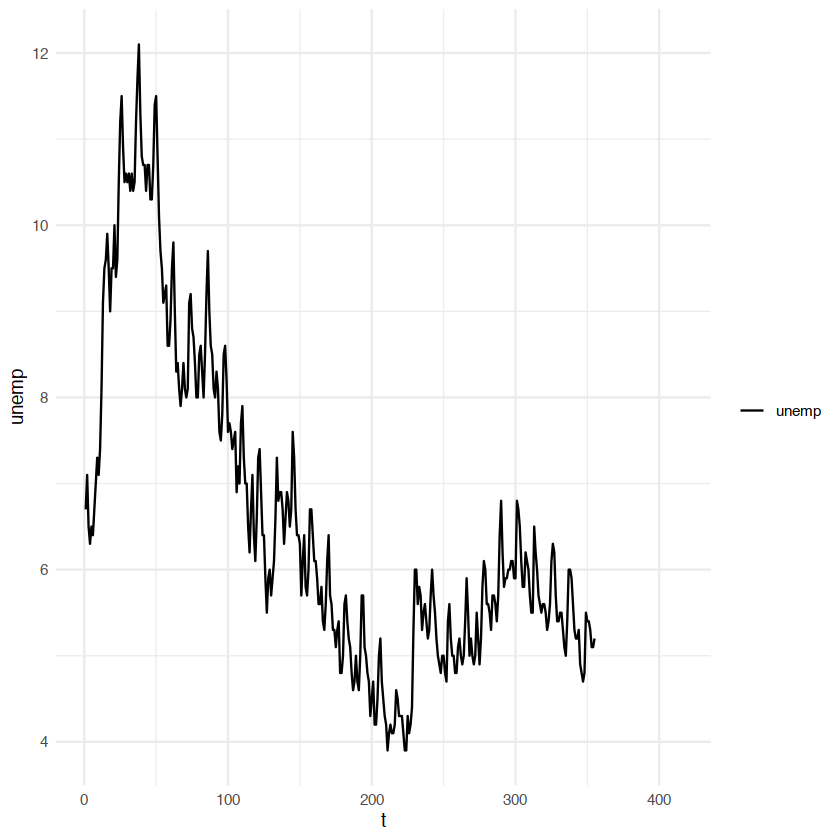

In [236]:
theme_set(theme_minimal())

p1 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = unemp, color="unemp")) +
    scale_colour_manual("", values = c("unemp"="black"))

p1

# Now let's remove noise. Firstly, let's compute $MA_t$ to average out the noise

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”
Warning message:
“Removed 71 row(s) containing missing values (geom_path).”


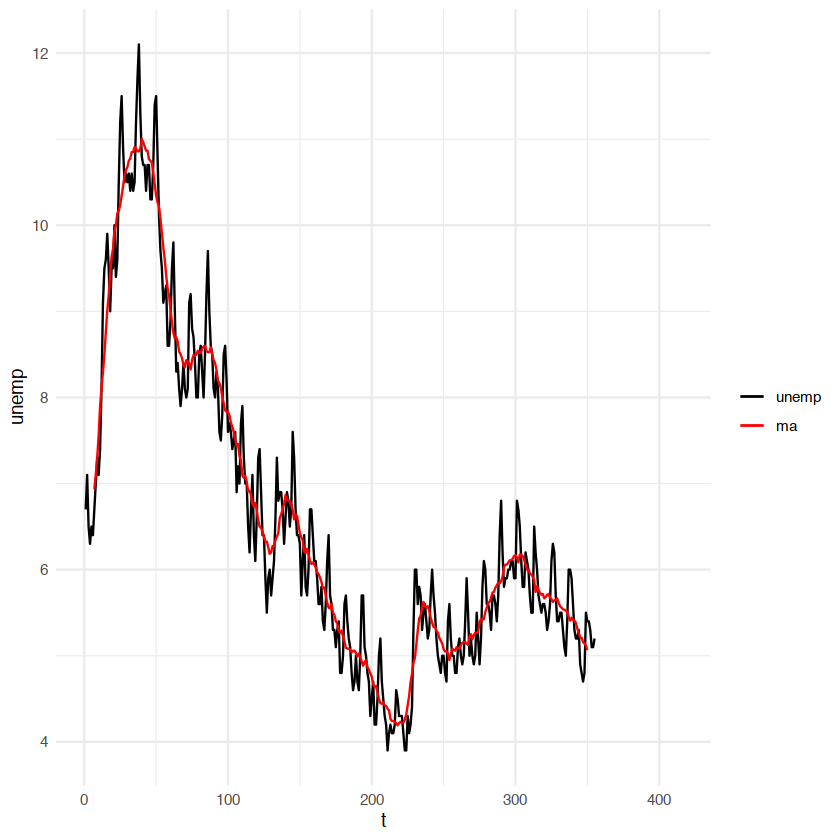

In [235]:
data$ma = (lag(data$unemp,6) + lag(data$unemp,5) + lag(data$unemp,4) + lag(data$unemp,3) + lag(data$unemp,2) + lag(data$unemp,2) + data$unemp + lead(data$unemp,1) + lead(data$unemp,2) + lead(data$unemp,3) + lead(data$unemp,4) + lead(data$unemp,5)) / 12

p2 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = unemp, color="unemp")) + 
    geom_line(aes(y = ma, color="ma")) +
    scale_colour_manual("", values = c("unemp"="black", "ma"="red"))

p2  

# compute $CMA_t$

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”
Warning message:
“Removed 72 row(s) containing missing values (geom_path).”


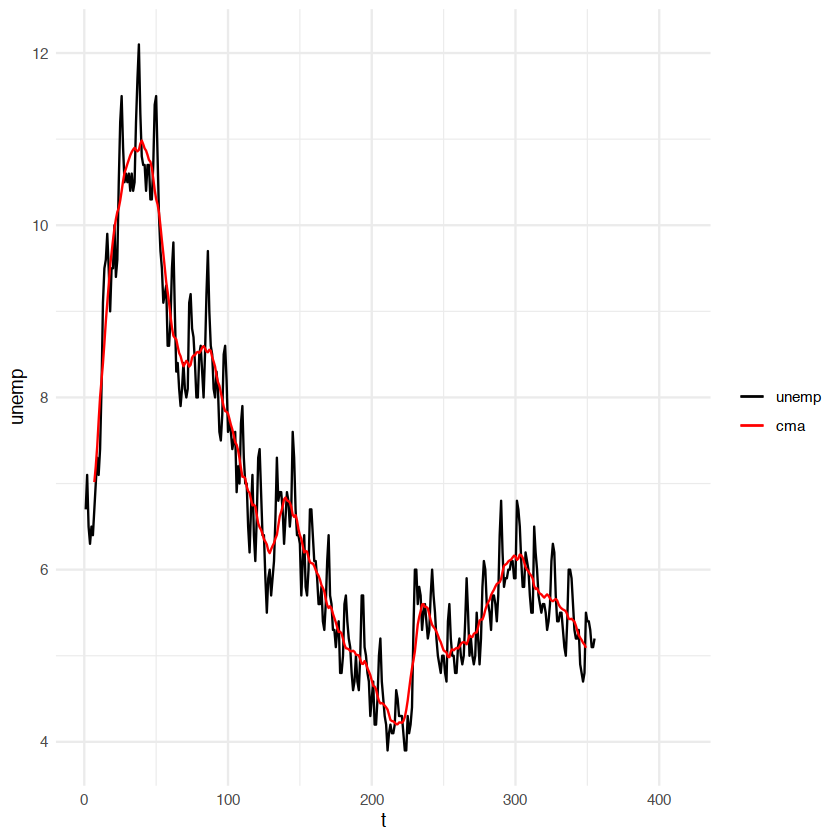

In [234]:
data$cma = (data$ma + lead(data$ma,1)) / 2

p3 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = unemp, color="unemp")) + 
    geom_line(aes(y = cma, color="cma")) +
    scale_colour_manual("", values = c("unemp"="black", "cma"="red"))

p3

# compute $\frac{Y_t}{CMA_t}$


Warning message:
“Removed 72 row(s) containing missing values (geom_path).”


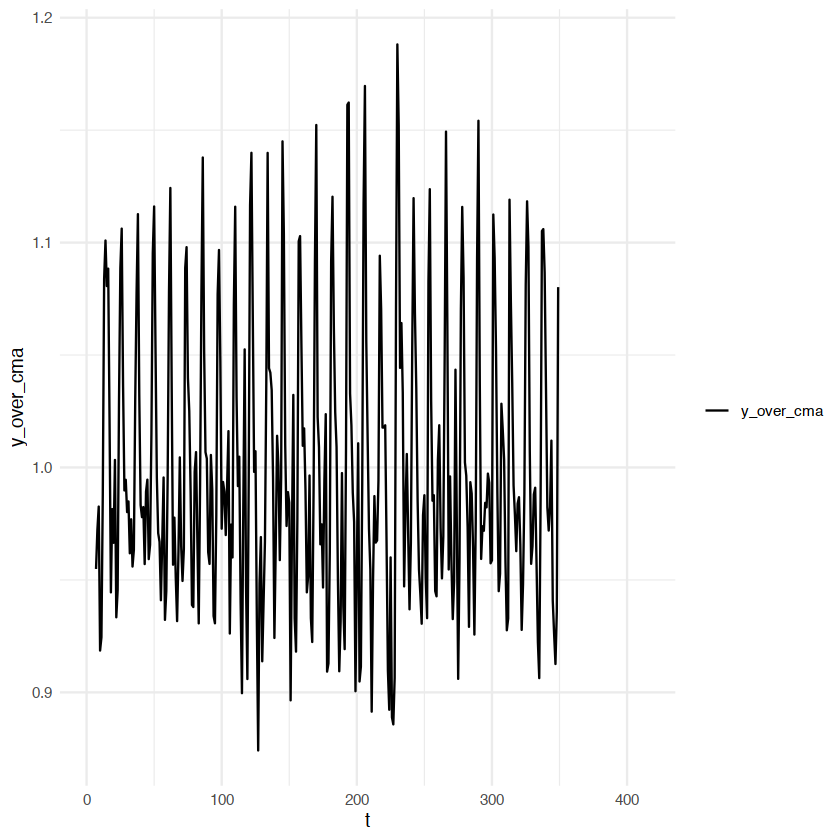

In [233]:
data$y_over_cma = data$unemp / data$cma

p4 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = y_over_cma, color="y_over_cma")) +
    scale_colour_manual("", values = c("y_over_cma"="black"))

p4

# after removing noise from unemp (which returns $\frac{Y_t}{CMA_t}$), let's extract $SN_t$ for $\frac{Y_t}{CMA_t}$.


Call:
lm(formula = y_over_cma ~ as.factor(Month) - 1, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.080382 -0.016820 -0.001371  0.016326  0.098865 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
as.factor(Month)1  1.090105   0.005068   215.1   <2e-16 ***
as.factor(Month)2  1.121865   0.005157   217.5   <2e-16 ***
as.factor(Month)3  1.053135   0.005157   204.2   <2e-16 ***
as.factor(Month)4  1.004339   0.005157   194.7   <2e-16 ***
as.factor(Month)5  0.992963   0.005157   192.5   <2e-16 ***
as.factor(Month)6  0.966771   0.005157   187.5   <2e-16 ***
as.factor(Month)7  0.943973   0.005068   186.3   <2e-16 ***
as.factor(Month)8  0.972661   0.005068   191.9   <2e-16 ***
as.factor(Month)9  0.997039   0.005068   196.7   <2e-16 ***
as.factor(Month)10 0.945741   0.005068   186.6   <2e-16 ***
as.factor(Month)11 0.934265   0.005068   184.4   <2e-16 ***
as.factor(Month)12 0.977365   0.005068   192.9   <2e-16 ***
---
Signif. codes:  0 ‘

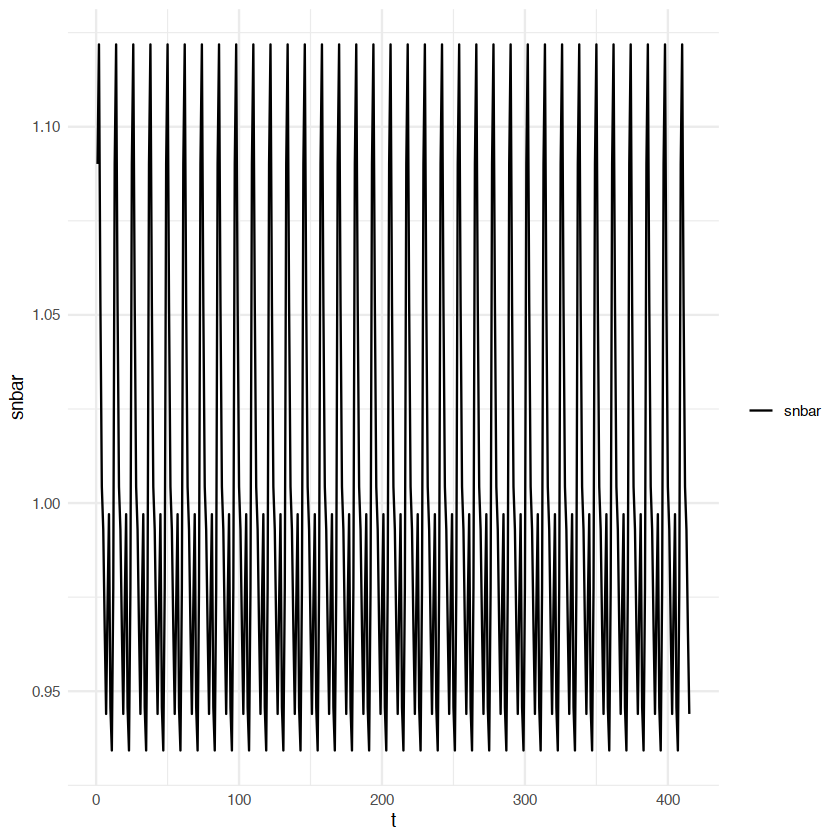

In [232]:
OLS_y_over_cma = lm(y_over_cma ~ as.factor(Month) - 1, data=data)

summary(OLS_y_over_cma)

data$snbar = predict(OLS_y_over_cma, data)


p5 = ggplot() + 
    geom_line(data=data, aes(x = t, y = snbar, color="snbar")) +
    scale_colour_manual("", values = c("snbar"="black"))

p5

# careful: the regression trick that we used during the lecture to find the mean of the snbar doesn't work here, because there are more Januaries-Julies than Augusts-Decembers in this data set. We can fix that by only regressing over the first year (or any year, really... or any period that includes equally many observations for each month)

In [175]:
snbarconst = mean(data$snbar[1:12])

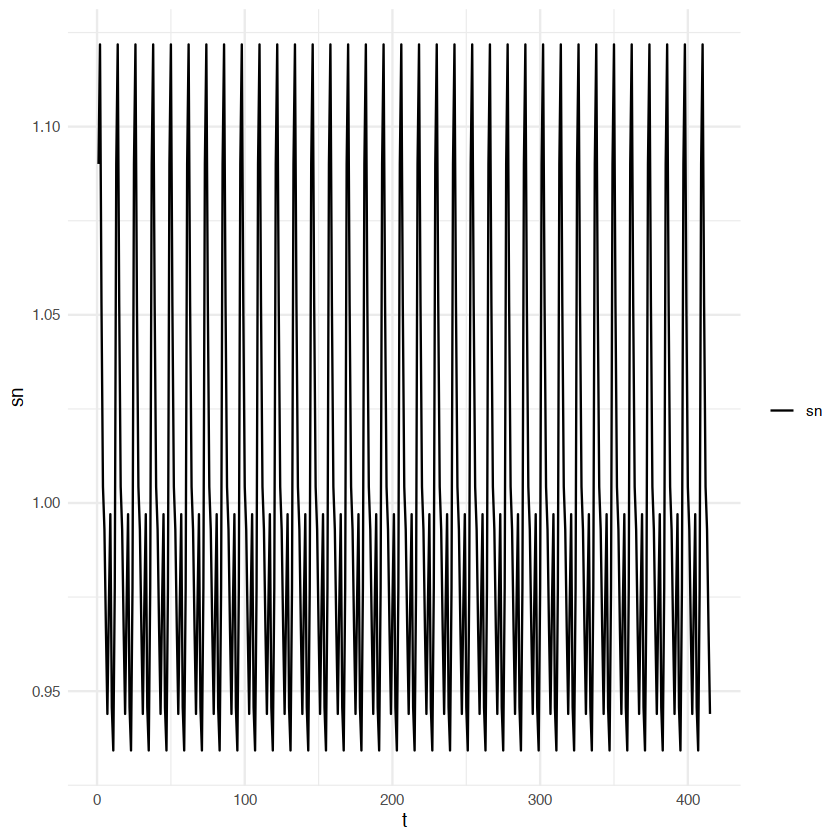

In [231]:
data$sn = data$snbar / snbarconst

p6 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = sn, color="sn")) +
    scale_colour_manual("", values = c("sn"="black"))

p6

# now let's remove $SN_t$ from unemp and generate $d_t$

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”
Warning message:
“Removed 60 row(s) containing missing values (geom_path).”


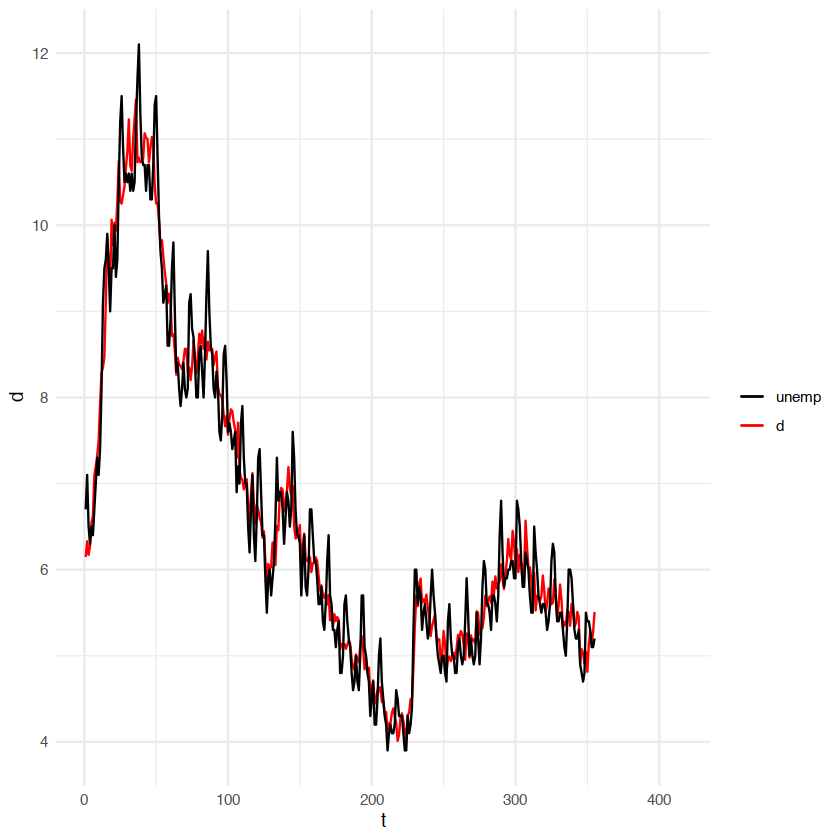

In [229]:
data$d = data$unemp / data$sn

p7 = ggplot(data, aes(x=t)) + 
    geom_line(aes(y = d, color="d")) + 
    geom_line(aes(y = unemp, color="unemp")) +
    scale_colour_manual("", values = c("unemp"="black", "d"="red"))

p7

# now let's use polynomial of time to extract the trend component


Call:
lm(formula = d ~ t + t2 + t3 + t4, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73357 -0.35088 -0.05279  0.37376  1.77857 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.596e+00  1.598e-01   47.54   <2e-16 ***
t            1.081e-01  6.200e-03   17.44   <2e-16 ***
t2          -1.632e-03  7.068e-05  -23.09   <2e-16 ***
t3           6.943e-06  2.981e-07   23.29   <2e-16 ***
t4          -9.214e-09  4.154e-10  -22.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5919 on 350 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.8978,	Adjusted R-squared:  0.8966 
F-statistic: 768.4 on 4 and 350 DF,  p-value: < 2.2e-16


Warning message:
“Removed 60 row(s) containing missing values (geom_path).”


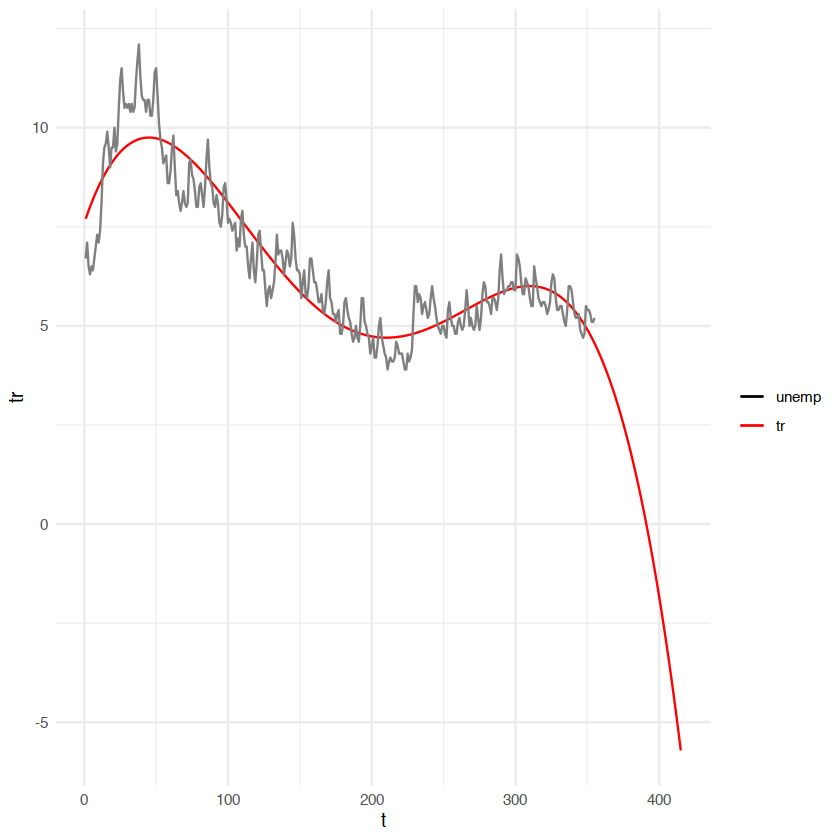

In [228]:
OLS_d = lm(d ~ t + t2 + t3 + t4, data=data)

summary(OLS_d)

pred_d = predict(OLS_d, data, se.fit=TRUE, interval="confidence")

data$tr = pred_d$fit[,1]

p8 = ggplot() + 
    geom_line(data=data, aes(x = t, y = tr, color="tr")) + 
    geom_line(data=data, aes(x = t, y = unemp, color="black")) +
    scale_colour_manual("", values = c("unemp"="black", "tr"="red"))

p8

# looks decent. not perfectly fitting the early 1990s unemployment peak, but maybe we can attribute the difference to a cyclical swing. we could add yet another power to that polynomial... but four is already feeling uncomfortably large

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”


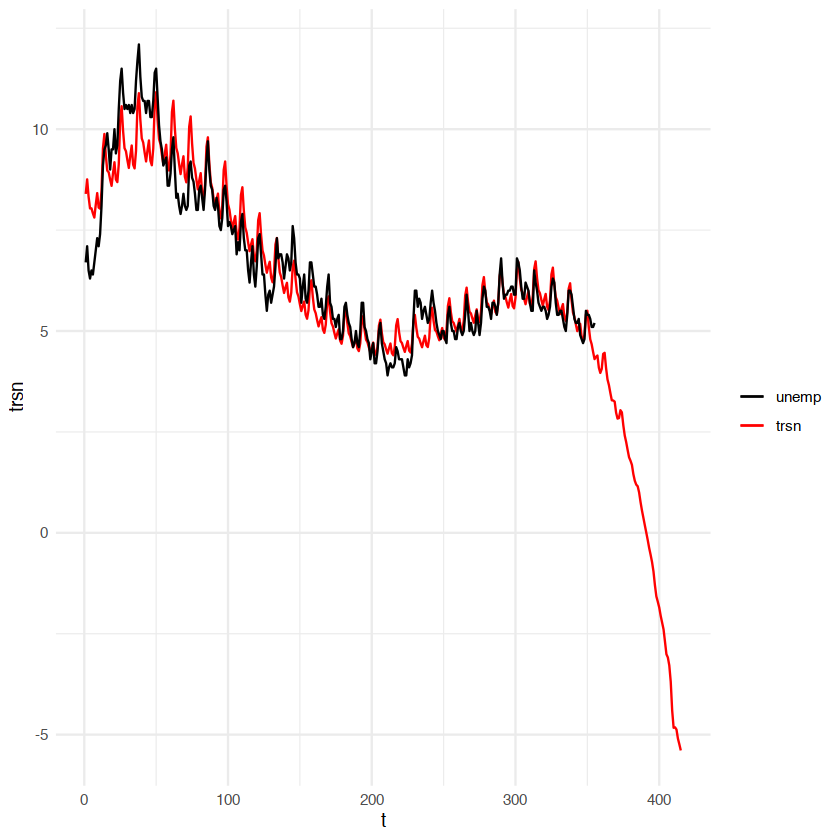

In [227]:
data$trsn = data$tr * data$sn

p9 = ggplot() + 
    geom_line(data=data, aes(x = t, y = trsn, color="trsn")) + 
    geom_line(data=data, aes(x = t, y = unemp, color="unemp")) +
    scale_colour_manual("", values = c("unemp"="black", "trsn"="red"))

p9

# get the standard errors for these forecasts and construct the prediction interval of $TR_t \cdot SN_t$

In [203]:
data$se_trsn = pred_d$se.fit
data$trsn_lo = data$trsn - 1.96 * data$se_trsn
data$trsn_hi = data$trsn + 1.96 * data$se_trsn

# now let's compute $CL_t \cdot IR_t$ and isolate $IR$ from $CL$ by using moving average again. Finally, let's compute $TR_t \cdot CL_t \cdot SN_t$

In [212]:
data$clir   = data$d / data$tr
data$cl     = (lag(data$clir,1) + data$clir + lead(data$clir,1))/3

data$cl[1]   = (2*data$clir[1]+data$clir[2])/3
data$cl[355] = (2*data$clir[355]+data$clir[354])/3

loc_nna = which(!is.na(data$unemp))
loc_na  = which(is.na(data$unemp))

data$cl[loc] = 1

data$ir     = data$clir / data$cl
data$trsncl = data$trsn * data$cl

# now let's plot everything and check if it works

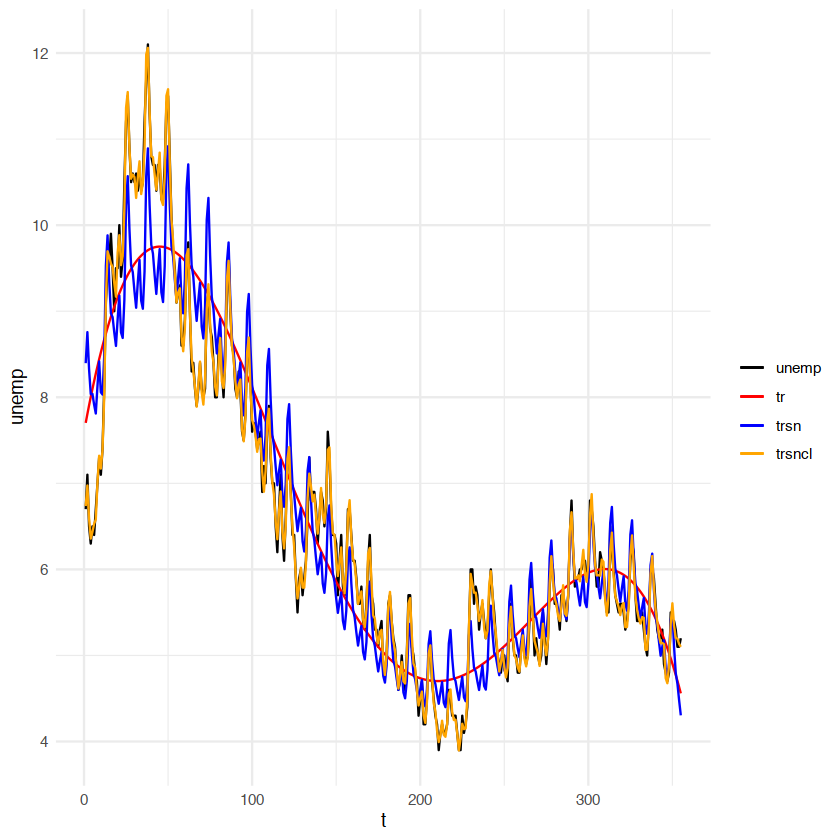

In [222]:
p10 = ggplot() +
    geom_line(data=data[loc_nna,], aes(x = t, y = unemp, color="unemp")) +
    geom_line(data=data[loc_nna,], aes(x = t, y = tr, color="tr")) +
    geom_line(data=data[loc_nna,], aes(x = t, y = trsn, color="trsn")) +
    geom_line(data=data[loc_nna,], aes(x = t, y = trsncl, color="trsncl")) +
    scale_colour_manual("", values = c("unemp"="black", "tr"="red", "trsn"="blue", "trsncl"="orange"))

p10

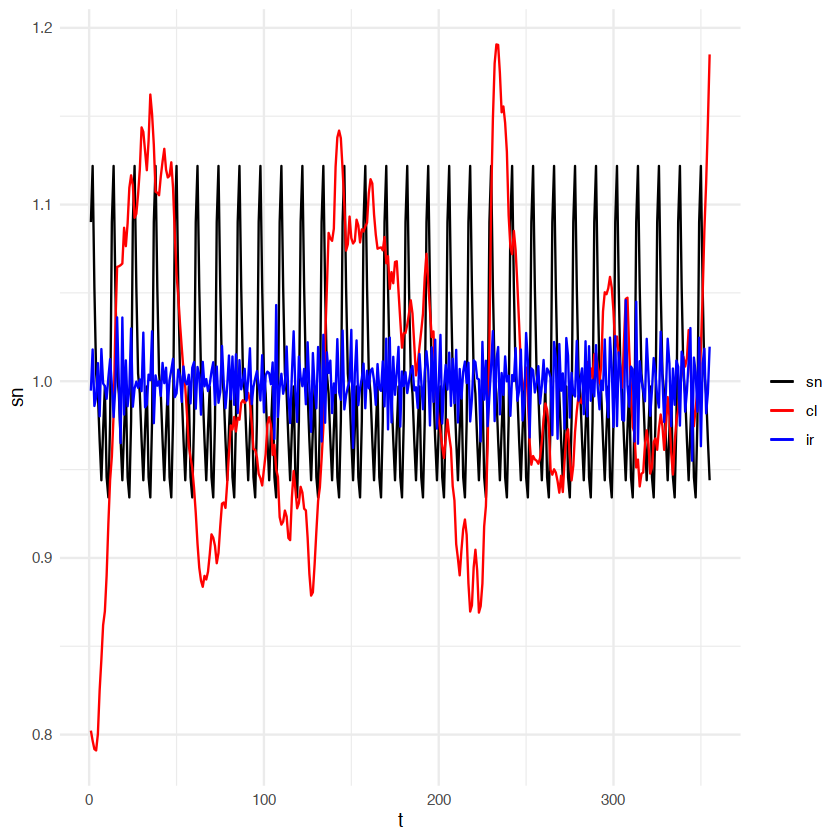

In [223]:
p11 = ggplot() + 
    geom_line(data=data[loc_nna,], aes(x = t, y = sn, color="sn")) + 
    geom_line(data=data[loc_nna,], aes(x = t, y = cl, color="cl")) + 
    geom_line(data=data[loc_nna,], aes(x = t, y = ir, color="ir")) +
    scale_colour_manual("", values = c("sn"="black", "cl"="red", "ir"="blue"))

p11

# everything looks pretty reasonable. Let's plot the prediction interval

Warning message:
“Removed 60 row(s) containing missing values (geom_path).”


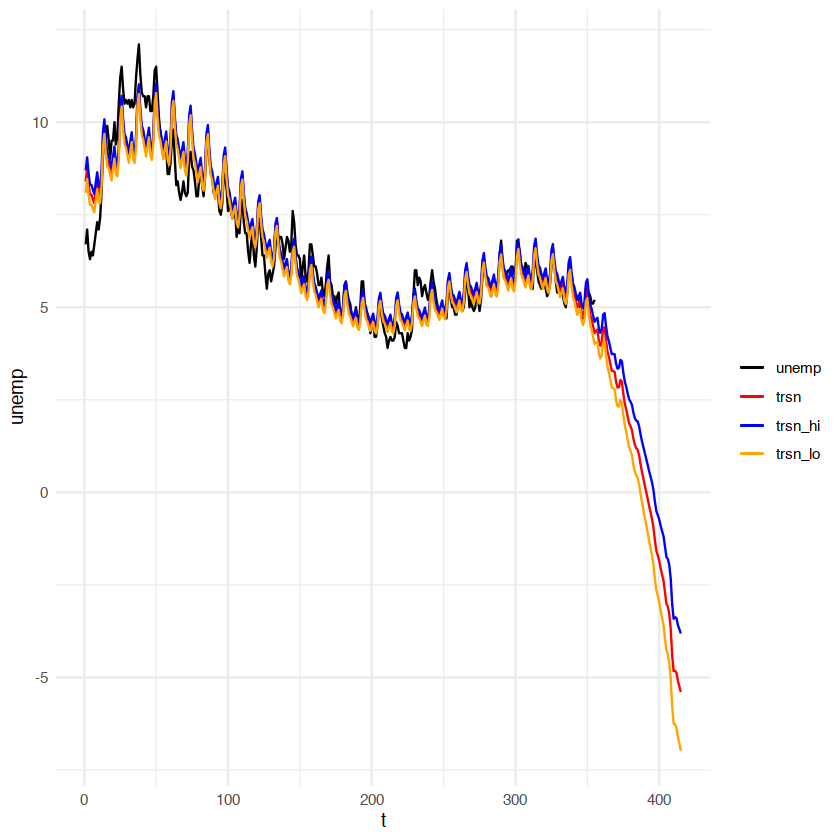

In [226]:
p12 = ggplot() + 
    geom_line(data=data, aes(x = t, y = unemp, color="unemp")) + 
    geom_line(data=data, aes(x = t, y = trsn, color="trsn")) + 
    geom_line(data=data, aes(x = t, y = trsn_hi, color="trsn_hi")) + 
    geom_line(data=data, aes(x = t, y = trsn_lo, color="trsn_lo")) +
    scale_colour_manual("", values = c("unemp"="black", "trsn"="red", "trsn_hi"="blue", "trsn_lo"="orange"))

p12